In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [6]:
df = pd.read_csv('/content/heart disease.csv')

task 1

1. Data Preparation:

Load the dataset into your preferred data analysis environment (e.g., Python with libraries like Pandas and NumPy).


In [7]:
display(df.head())

,age,sex,cp,trestbps,chol,fbs,restecg,thalch,exang,oldpeak,slope,thal,num
0,63,Male,typical angina,145,233,True,lv hypertrophy,150,FALSE,2.3,downsloping,fixed defect,0
1,41,Male,atypical angina,135,203,False,normal,132,FALSE,0.0,flat,fixed defect,0
2,57,Male,asymptomatic,140,192,False,normal,148,FALSE,0.4,flat,fixed defect,0
3,52,Male,typical angina,118,186,False,lv hypertrophy,190,FALSE,0.0,flat,fixed defect,0
4,57,Male,asymptomatic,110,201,False,normal,126,TRUE,1.5,flat,fixed defect,0


In [8]:

print("Shape:", df.shape)

# Data types and missing values
print("\nInfo:")
print(df.info())

# Summary statistics
print("\nDescribe:")
print(df.describe())

# Missing values count
print("\nMissing values:")
print(df.isnull().sum())

Shape: (908, 13)

Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 908 entries, 0 to 907
Data columns (total 13 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       908 non-null    int64  
 1   sex       908 non-null    object 
 2   cp        908 non-null    object 
 3   trestbps  908 non-null    int64  
 4   chol      908 non-null    int64  
 5   fbs       908 non-null    bool   
 6   restecg   908 non-null    object 
 7   thalch    908 non-null    int64  
 8   exang     908 non-null    object 
 9   oldpeak   846 non-null    float64
 10  slope     908 non-null    object 
 11  thal      908 non-null    object 
 12  num       908 non-null    int64  
dtypes: bool(1), float64(1), int64(5), object(6)
memory usage: 86.1+ KB
None

Describe:
              age    trestbps        chol      thalch     oldpeak         num
count  908.000000  908.000000  908.000000  908.000000  846.000000  908.000000
mean    53.791850  133.430617  201.484581 

task 2

2. Exploratory Data Analysis (EDA):

Perform exploratory data analysis to understand the structure of the dataset.

Check for missing values, outliers, and inconsistencies in the data.

Visualize the distribution of features, including histograms, box plots.

<Axes: >

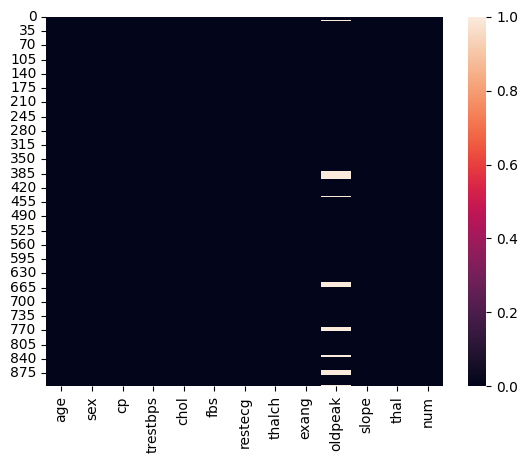

In [9]:
sns.heatmap(df.isna())

In [10]:
df['oldpeak'].fillna(df['oldpeak'].mean(), inplace=True)

/tmp/ipython-input-682706077.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['oldpeak'].fillna(df['oldpeak'].mean(), inplace=True)


array([[<Axes: title={'center': 'age'}>,
        <Axes: title={'center': 'trestbps'}>],
       [<Axes: title={'center': 'chol'}>,
        <Axes: title={'center': 'thalch'}>],
       [<Axes: title={'center': 'oldpeak'}>,
        <Axes: title={'center': 'num'}>]], dtype=object)

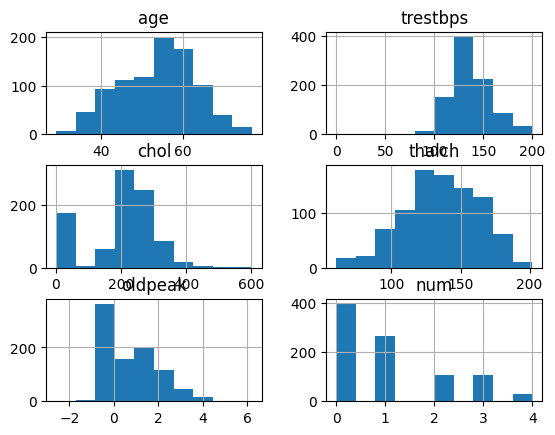

In [11]:
df.hist()

<Axes: >

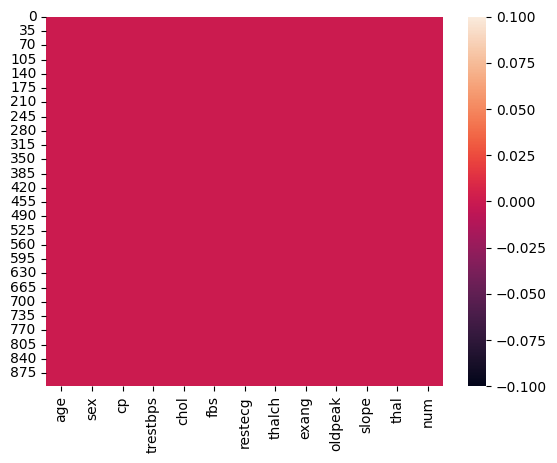

In [12]:
sns.heatmap(df.isna())

Outlier treatment


<Axes: >

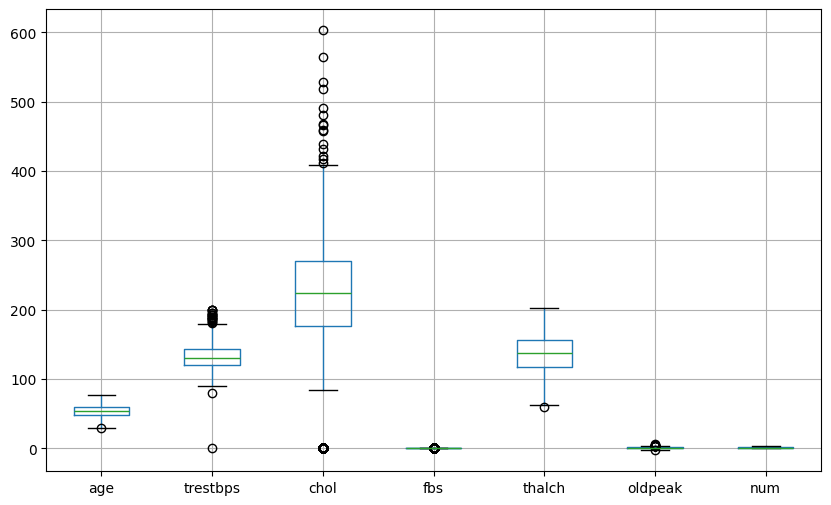

In [13]:
df.boxplot(figsize=(10,6))

In [ ]:
# 4. Correlation matrix (numeric only)
plt.figure(figsize=(12,8))
sns.heatmap(df[num_cols].corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

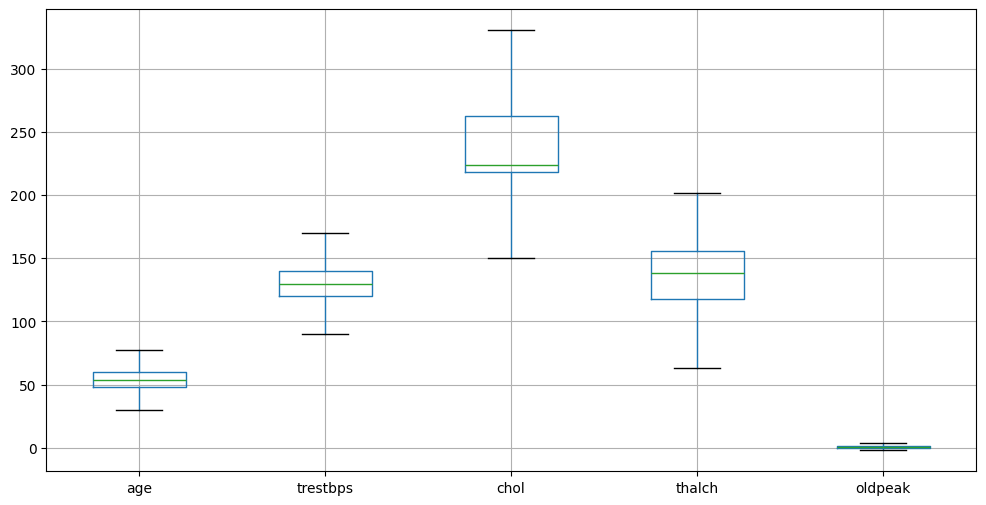

In [43]:
cols = ['age','trestbps','chol','thalch','oldpeak']
bounds = {} #compute the cut-off bounds

# first compute bounds
for col in cols:
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    lower = Q1 - 1.5 * IQR
    upper = Q3 + 1.5 * IQR
    bounds[col] = (lower, upper)

# then clip once using stored bounds
for col in cols:
    lower, upper = bounds[col] #saving the two no so we can use them aftr the loop
    df[col] = df[col].clip(lower, upper)

plt.figure(figsize=(12,6))
df[cols].boxplot()
plt.show()

In [46]:


# 3. Check for missing values
print("Missing values per column:\n", df.isnull().sum())

# Example: fill numeric missing values with median
num_cols = df.select_dtypes(include=[np.number]).columns
for col in num_cols:
    df[col] = df[col].fillna(df[col].median())

# Example: fill categorical missing values with mode
cat_cols = df.select_dtypes(include=['object']).columns
for col in cat_cols:
    df[col] = df[col].fillna(df[col].mode()[0])

print("\nAfter filling missing values:\n", df.isnull().sum())


# 6. Feature engineering: encode categorical variables
# if you have string columns
df_encoded = pd.get_dummies(df, drop_first=True)  # one-hot encode and drop first dummy



Missing values per column:
 age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalch      0
exang       0
oldpeak     0
slope       0
thal        0
num         0
dtype: int64

After filling missing values:
 age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalch      0
exang       0
oldpeak     0
slope       0
thal        0
num         0
dtype: int64


3. Feature Engineering:

If necessary, perform feature engineering techniques such as encoding categorical variables, scaling numerical features, or handling missing values.


In [52]:
from sklearn.preprocessing import StandardScaler
# 6. Feature engineering: encode categorical variables
# if you have string columns
df_encoded = pd.get_dummies(df, drop_first=True)  # one-hot encode and drop first dummy

# Initialize StandardScaler
scaler = StandardScaler()

# find numeric columns after encoding
numeric_after_enc = df_encoded.select_dtypes(include=[np.number]).columns.tolist()
numeric_after_enc.remove('num')  # don't scale target variable

df_encoded[numeric_after_enc] = scaler.fit_transform(df_encoded[numeric_after_enc])

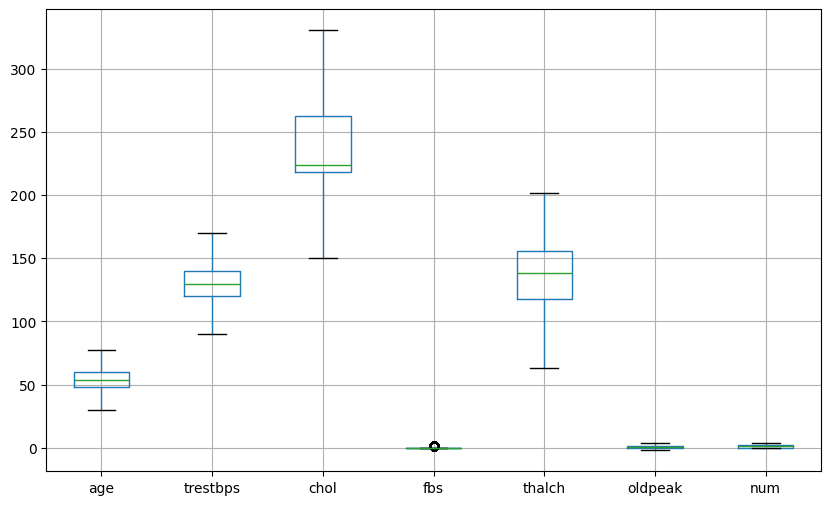

In [49]:
df.boxplot(figsize=(10,6))
plt.show()

4. Decision Tree Classification:

Split the dataset into training and testing sets (e.g., using an 80-20 split).

Implement a Decision Tree Classification model using a library like scikit-learn.

Train the model on the training set and evaluate its performance on the testing set using appropriate evaluation metrics (e.g., accuracy, precision, recall, F1-score, ROC-AUC).



Confusion Matrix:
 [[62 17  4  2  4]
 [14 23  6  3  2]
 [ 4  7  7  4  0]
 [ 6  8  0  3  0]
 [ 0  4  0  1  1]]

Classification Report:
               precision    recall  f1-score   support

           0       0.72      0.70      0.71        89
           1       0.39      0.48      0.43        48
           2       0.41      0.32      0.36        22
           3       0.23      0.18      0.20        17
           4       0.14      0.17      0.15         6

    accuracy                           0.53       182
   macro avg       0.38      0.37      0.37       182
weighted avg       0.53      0.53      0.53       182


Accuracy Score: 0.5274725274725275


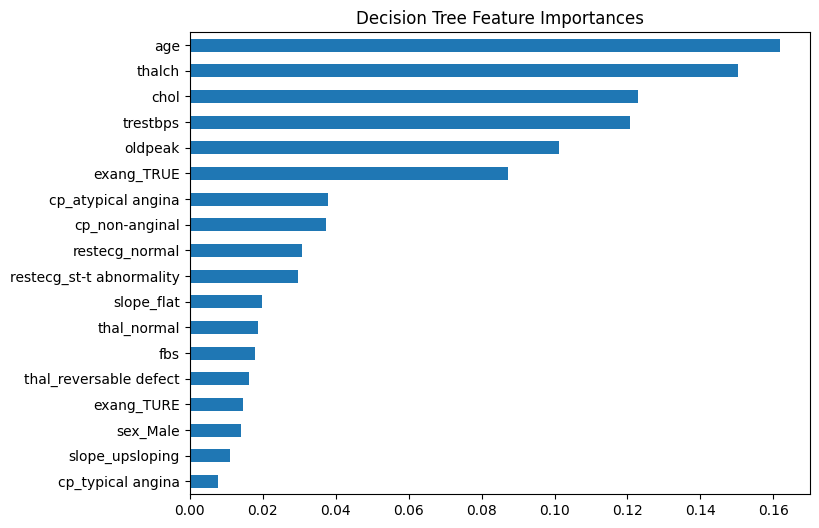

In [55]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score


# 8. Split into features and target
X = df_encoded.drop('num', axis=1)
y = df_encoded['num']

X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                    test_size=0.2,
                                                    random_state=42) #spliting data into 80-20 split

# 9. Train a Decision Tree Classifier
dt = DecisionTreeClassifier(random_state=42)
dt.fit(X_train, y_train)

# 10. Predict and Evaluate
y_pred = dt.predict(X_test)

print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))
print("\nAccuracy Score:", accuracy_score(y_test, y_pred))

# 11. Feature importances
importances = pd.Series(dt.feature_importances_, index=X.columns)
importances.sort_values().plot(kind='barh', figsize=(8,6))
plt.title('Decision Tree Feature Importances')
plt.show()

In [56]:
#set a basic decision tree

dt=DecisionTreeClassifier(random_state=42)

#defining the hyperparameter grid

param_grid={
    'max_depth':[3,4,5,6,7,8,9,10],
    'min_samples_split':[2,3,4,5,6,7,8,9,10],
    'criterion':['gini','entropy']
}


In [60]:
from sklearn.model_selection import GridSearchCV

# 5. Grid Search with cross-validation
#chooses the best combination based on cross validated accuracy

grid_search = GridSearchCV(estimator=dt,
                           param_grid=param_grid,
                           cv=5,             # 5-fold cross-validation
                           scoring='accuracy',
                           n_jobs=-1)

grid_search.fit(X_train, y_train)

print("Best parameters found:", grid_search.best_params_)
print("Best cross-validation accuracy:", grid_search.best_score_)



Best parameters found: {'criterion': 'entropy', 'max_depth': 3, 'min_samples_split': 2}
Best cross-validation accuracy: 0.5482475200755788


6. Model Evaluation and Analysis:

Analyse the performance of the Decision Tree model using the evaluation metrics obtained.

Visualize the decision tree structure to understand the rules learned by the model and identify important features


 Test Accuracy: 0.5439560439560439

 Classification Report:
               precision    recall  f1-score   support

           0       0.65      0.89      0.75        89
           1       0.39      0.33      0.36        48
           2       0.50      0.05      0.08        22
           3       0.18      0.18      0.18        17
           4       0.00      0.00      0.00         6

    accuracy                           0.54       182
   macro avg       0.34      0.29      0.27       182
weighted avg       0.50      0.54      0.49       182



/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


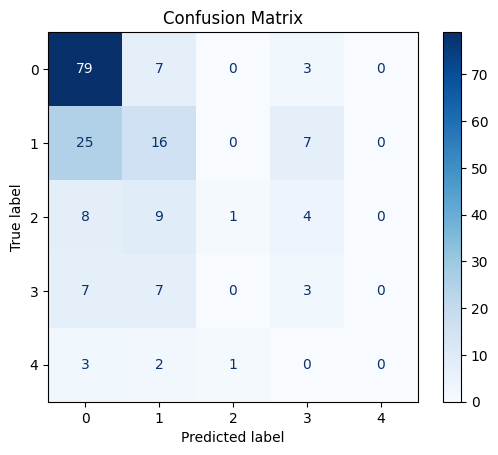

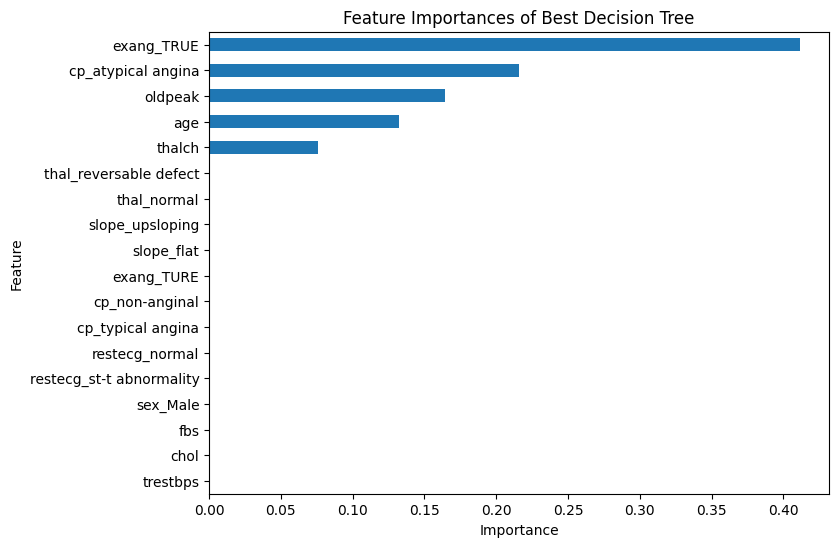

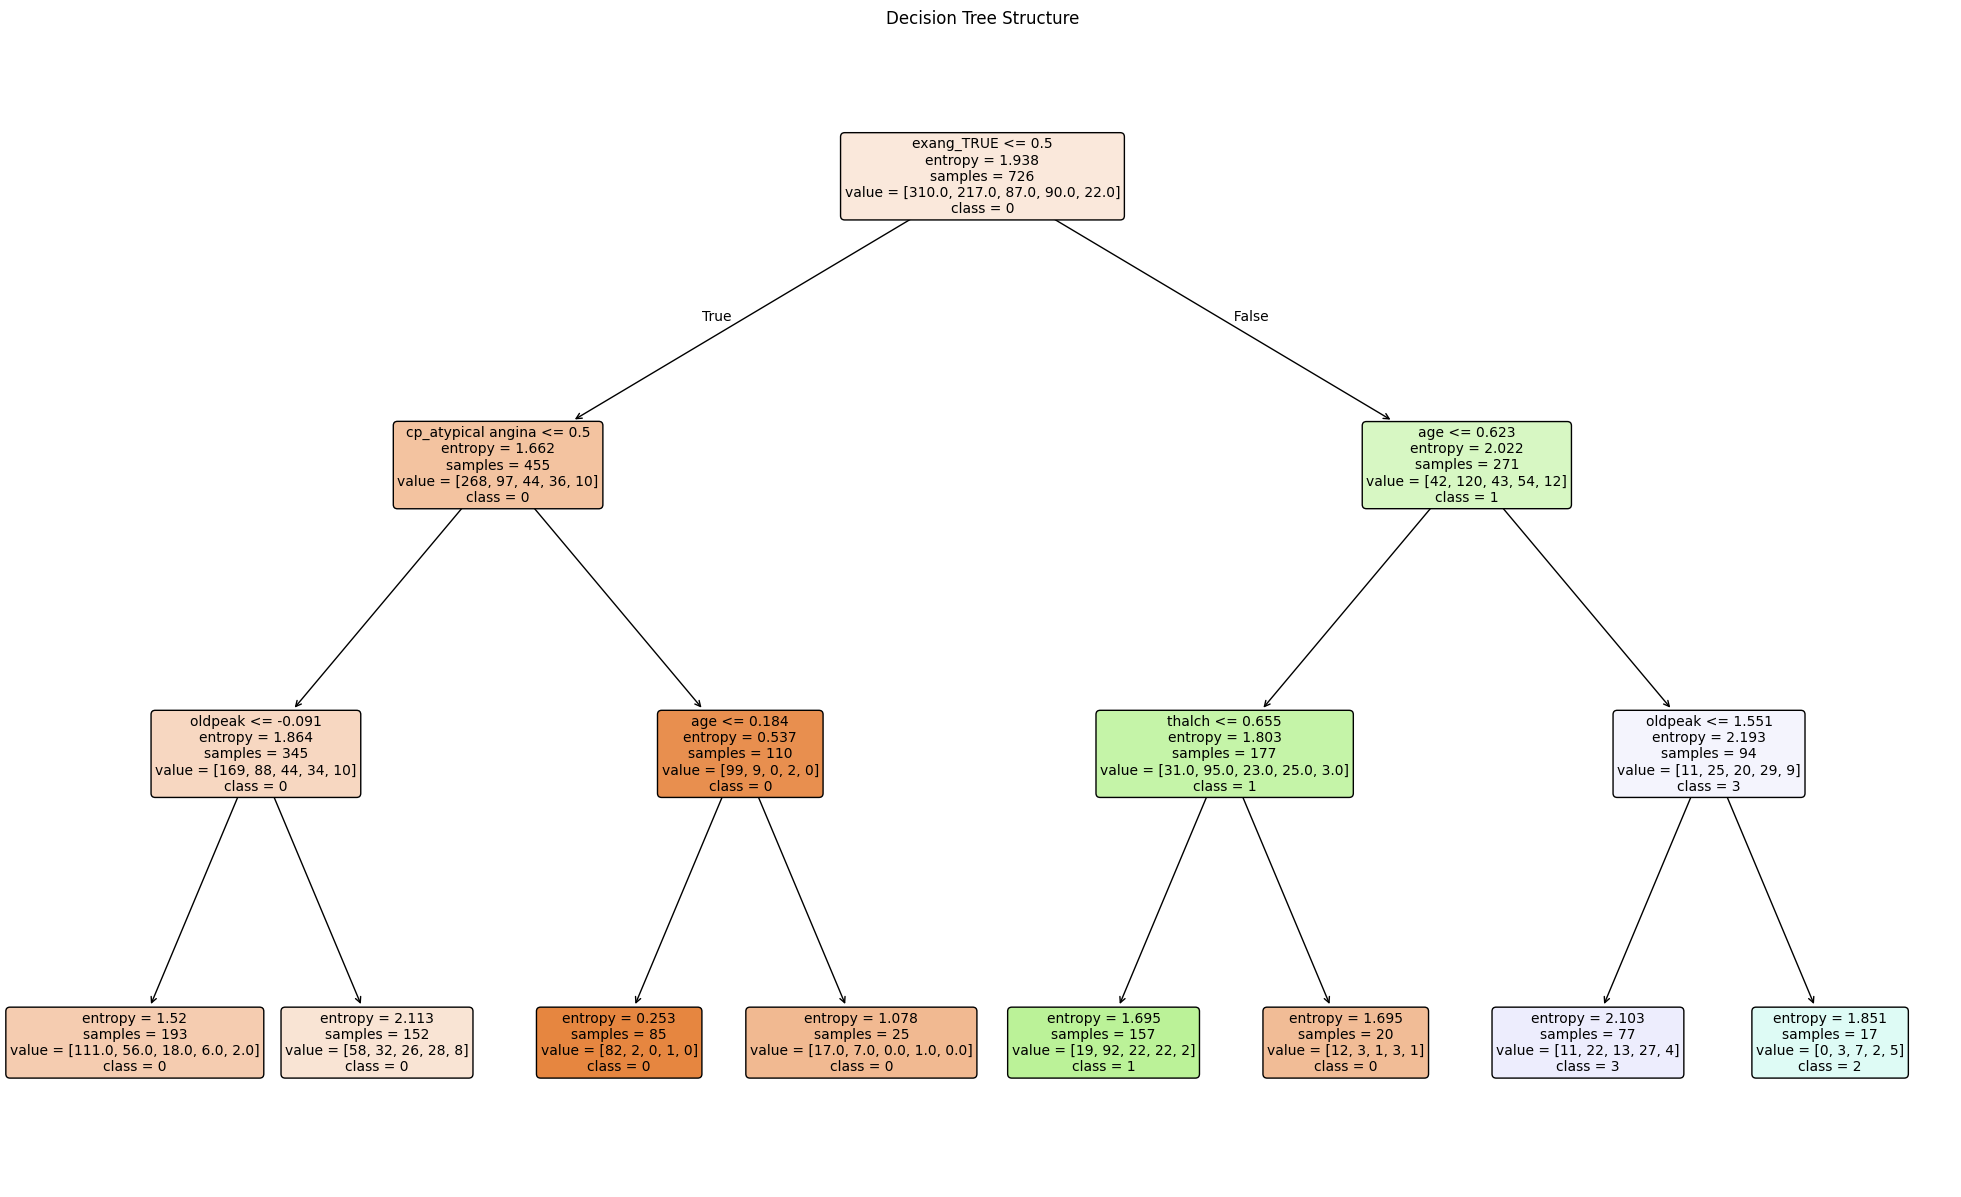

In [63]:
from sklearn.metrics import (
    accuracy_score,
    classification_report,
    confusion_matrix,
    ConfusionMatrixDisplay
)
from sklearn import tree
import matplotlib.pyplot as plt

#  1. Evaluate performance on the test set
y_pred = best_dt.predict(X_test) # use  to trainn model  to make prediction on the test data

print(" Test Accuracy:", accuracy_score(y_test, y_pred)) # overall % of correcy pridiction
print("\n Classification Report:\n", classification_report(y_test, y_pred))#presision recall F1 score per class

#  2. Confusion Matrix : to see where is model making the mistake
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm,
                              display_labels=best_dt.classes_)
disp.plot(cmap=plt.cm.Blues)
plt.title("Confusion Matrix")
plt.show()

#  3. Feature Importances :to know which feature matter more
importances = pd.Series(best_dt.feature_importances_, index=X.columns)
plt.figure(figsize=(8,6))
importances.sort_values().plot(kind='barh')
plt.title("Feature Importances of Best Decision Tree")
plt.xlabel("Importance")
plt.ylabel("Feature")
plt.show()

#  4. Visualize the Decision Tree Structure :help us to show full tree path,each split,thresholdand disision path
plt.figure(figsize=(25,15))
tree.plot_tree(
    best_dt,
    feature_names=X.columns,
    class_names=[str(c) for c in best_dt.classes_],
    filled=True, # true colour nodes by predicted class
    rounded=True, #to makes boxes rounded
    fontsize=10
)
plt.title("Decision Tree Structure")# drawing the actual structure of the trained tree
plt.show()

Interview Questions:
1. What are some common hyperparameters of decision tree models, and how do they affect the model's performance?
2. What is the difference between the Label encoding and One-hot encoding?



Common hyperparameters of Decision Tree models and their effect

> “Some of the main hyperparameters in a decision tree are:

max_depth – limits how deep the tree can grow. A small depth can underfit (too simple), and a very large depth can overfit (memorize training data).

min_samples_split – the minimum number of samples needed to split a node. Higher values make the tree less complex and reduce overfitting.

min_samples_leaf – the minimum number of samples a leaf node must have. This also controls complexity; bigger leaves mean a smoother model.

criterion – the metric used to measure the quality of a split (gini, entropy, or log_loss). Different criteria can slightly change how the tree chooses splits.

max_features – how many features to consider when looking for the best split. Restricting this can help generalisation.


By tuning these hyperparameters, we balance bias and variance — basically, how well the tree fits training vs unseen data.




---

 Difference between Label Encoding and One-Hot Encoding

Label encoding turns each category into an integer number (for example, red=0, green=1, blue=2). It’s simple but it introduces an artificial order between categories, which can confuse algorithms that think numbers have magnitude.

One-hot encoding creates a new binary column for each category (for example, red=[1,0,0], green=[0,1,0], blue=[0,0,1]). There’s no order implied, so it’s safer for most machine-learning models. It does make the dataset bigger though